In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

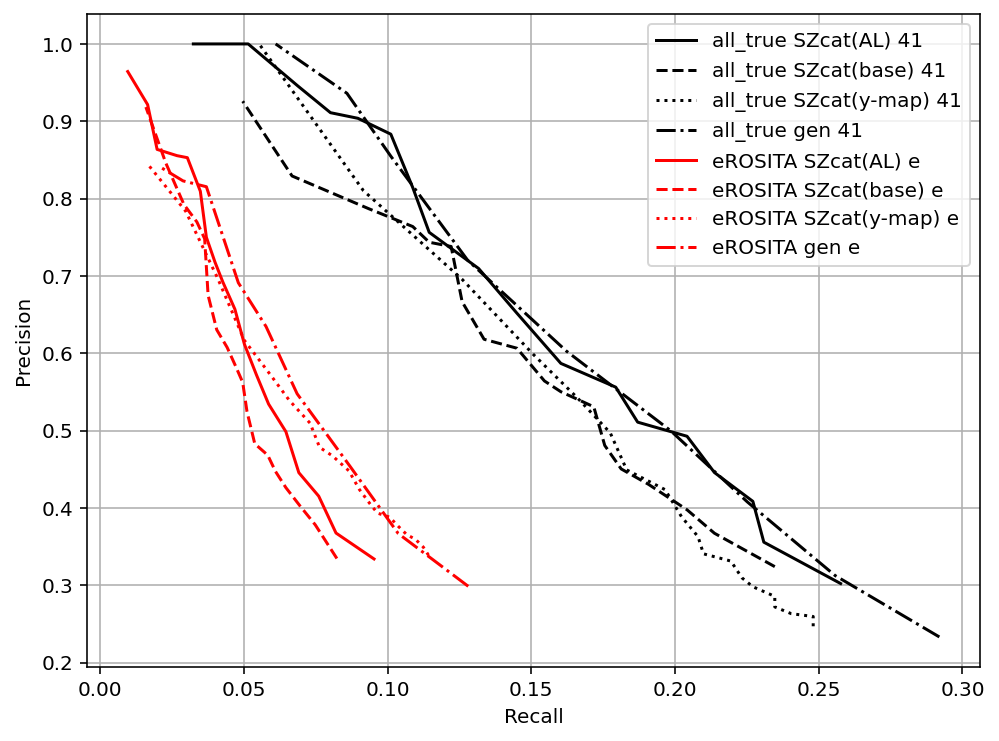

In [10]:
def show_precision_recall(ax, pixname, selected_det, selected_tr=['all_true', 'eROSITA', 'PSZ2(z)'], 
                          colors='krb', alpha=1, linestyles=['-', '--'], index_name='max_pred',
                         cut_df=None):
    recalls = {name : pd.read_csv('./check/{}_recall_{}_pix{}.csv'.format(name, index_name.replace('/', ''), pixname))
                  for name in selected_det}
    if not (cut_df is None):
        for name in recalls:
            df = recalls[name]
            df = df[df['mpp'] >= cut_df]
            df.index = np.arange(len(df))
            recalls[name] = df
    for c, recall_prm, prec_prm in zip(colors, ['all_true', 'eROSITA', 'PSZ2(z)'], 
                                       ['precision', 'precision_eROSITA', 'precision_PSZ2(z)']):
        if not (recall_prm in selected_tr):
            continue
        for name_cat, st in zip(recalls, linestyles):
            df = recalls[name_cat]
            s, = ax.plot(df[recall_prm], df[prec_prm], c=c, linestyle=st, alpha=alpha)
            s.set_label(recall_prm + ' ' + name_cat + ' ' + pixname)
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')

_, ax = plt.subplots(1, 1, figsize=(8, 6))
for pixname, selected_tr, colors in zip(['41', 'e'], (['all_true'], ['eROSITA']), ['k', 'br']):
    dets = (['SZcat(AL)', 'SZcat(base)'], ['SZcat(y-map)'], ['gen'])
    lines = (['-', '--'], [':'], ['dashdot'])
    indexes = ('max_pred', 's/n', 'mpp')
    for selected_det, linest, index_name in zip(dets, lines, indexes):
        show_precision_recall(ax, pixname, selected_tr=selected_tr, colors=colors, selected_det=selected_det, linestyles=linest,
                             cut_df=0.3 if selected_det[0] == 'gen' else None, index_name=index_name)
ax.grid()
ax.legend()

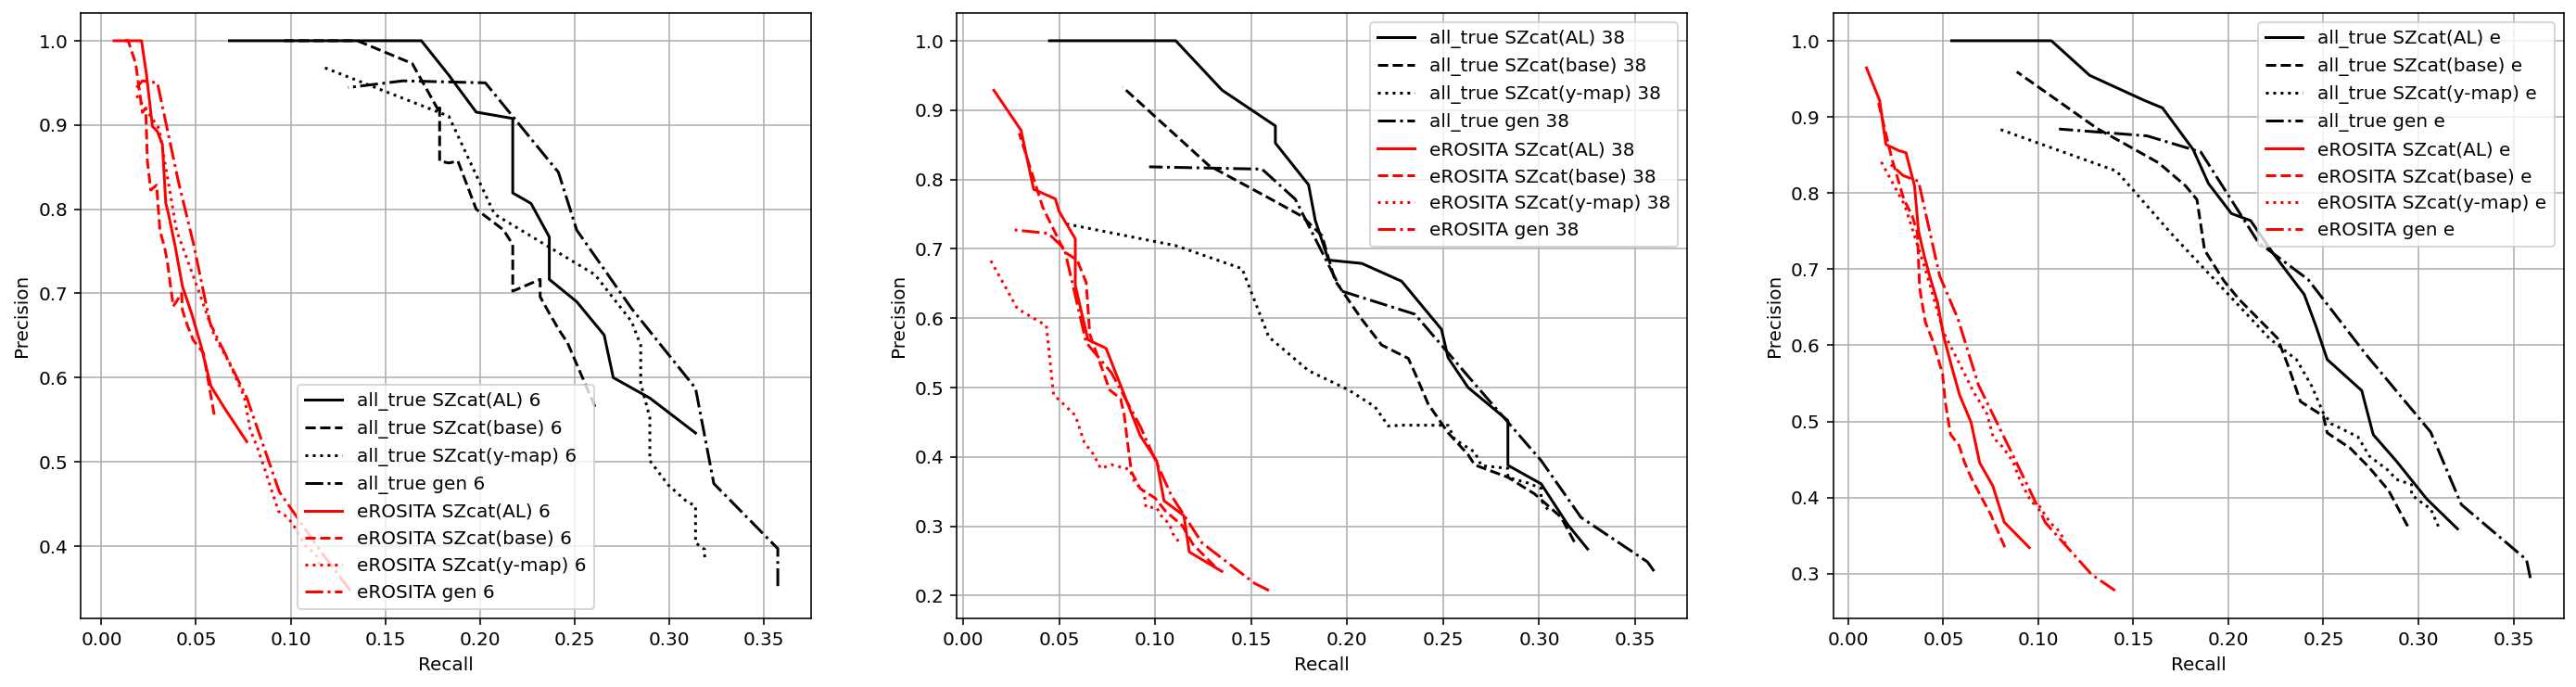

In [12]:
_, ax = plt.subplots(1, 3, figsize=(24, 6))
for i, pixname in enumerate(['6', '38', 'e']):
    for selected_tr, colors in zip((['all_true'], ['eROSITA']), ['k', 'br']):
        dets = (['SZcat(AL)', 'SZcat(base)'], ['SZcat(y-map)'], ['gen'])
        lines = (['-', '--'], [':'], ['dashdot'])
        indexes = ('max_pred', 's/n', 'mpp')
        for selected_det, linest, index_name in zip(dets, lines, indexes):
            show_precision_recall(ax[i], pixname, selected_tr=selected_tr, colors=colors, selected_det=selected_det, linestyles=linest,
                                 index_name=index_name)
    ax[i].grid()
    ax[i].legend()

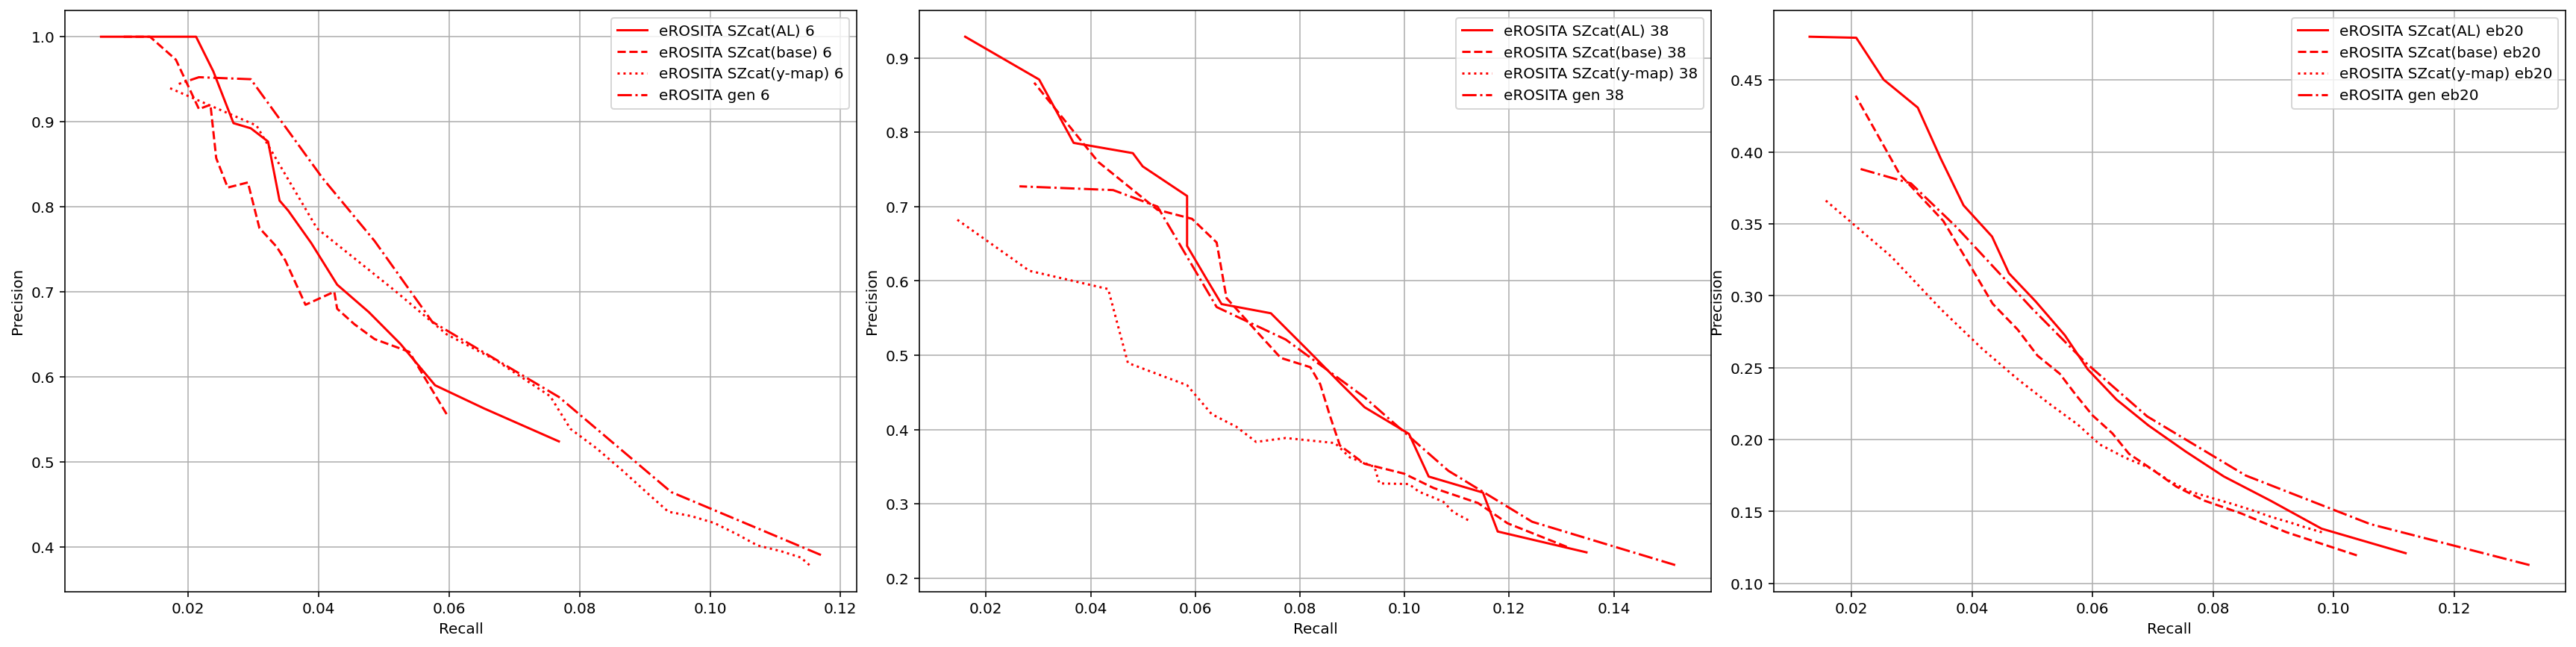

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
fig.tight_layout()
for i, pixname in enumerate(['6', '38', 'eb20']):
    tr = (['eROSITA'])
    c = ['br']
    for selected_tr, colors in zip(tr, c):
        dets = (['SZcat(AL)', 'SZcat(base)'], ['SZcat(y-map)'], ['gen'])
        lines = (['-', '--'], [':'], ['dashdot'])
        indexes = ('max_pred', 's/n', 'mpp')
        for selected_det, linest, index_name in zip(dets, lines, indexes):
            show_precision_recall(ax[i], pixname, selected_tr=selected_tr, colors=colors, selected_det=selected_det, linestyles=linest,
                                 cut_df=0.3 if selected_det[0] == 'gen' else None, index_name=index_name)
    ax[i].grid()
    ax[i].legend()